# $$  Session-16-Assignment-1 $$

In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference. 
The raw image is available in spicy.misc package with the name face. 

In [1]:
import numpy as np
from scipy import misc
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
from skimage.measure import compare_ssim as ssim

In [2]:
# Loading Data
face = misc.face(gray=True)
face.shape

(768, 1024)

<Figure size 432x288 with 0 Axes>

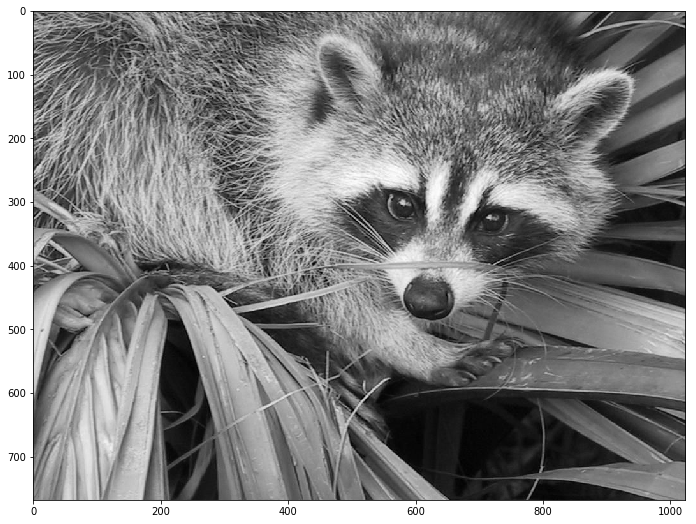

In [3]:
#Show image of raccoon face.
plt.gray()
plt.figure(figsize=(16,9))
plt.imshow(face)
plt.show()



In [4]:
#Prints the shape of the face
print(face.shape)

(768, 1024)


In [5]:
#Prints data type of face
print(face.dtype)

uint8


## Image Compression

In [6]:
#Given, number of clusters = 5
n_clusters = 5

#Reshaping the image
image = face.reshape(face.shape[0]*face.shape[1],1)

#Initializing KMeans
kmeans= cluster.KMeans(n_clusters=n_clusters,n_init=10,max_iter=100, random_state=0)

#Fitting with input
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [7]:
#Rows and Columns size of the face image
rows = face.shape[0]
cols = face.shape[1]

#KMeans labels as array
labels = np.asarray(kmeans.labels_,dtype=np.uint8 ) 

#Reshaping the labels with shape of face image
face_compressed = labels.reshape(rows,cols)

<Figure size 432x288 with 0 Axes>

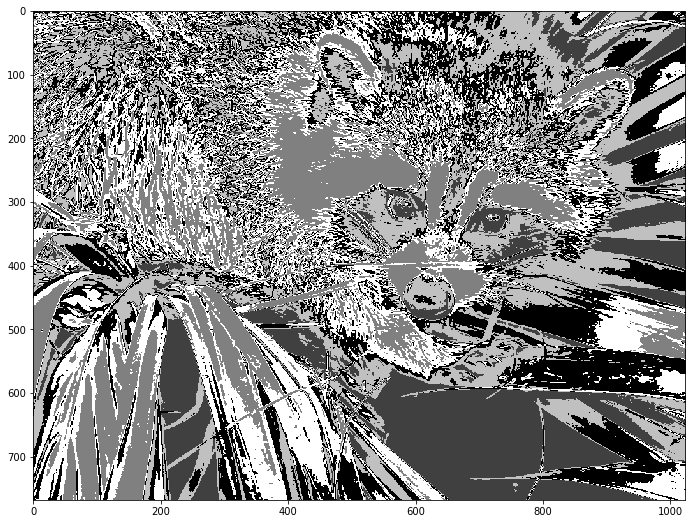

In [8]:
#Show image of compressed raccoon face
plt.gray()
plt.figure(figsize=(16,9))
plt.imshow(face_compressed)

## Compare Two Images

In [9]:
def compare_images(imageA, imageB, title):
        
    #Setup the figure
    fig = plt.figure(figsize=(16,9))
    plt.title(title)   
 
    #Shows first image
    ax = fig.add_subplot(1, 2, 1)    
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
 
    #Shows the second image
    ax = fig.add_subplot(1, 2, 2)    
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
 
    #Shows the images   
    plt.show()

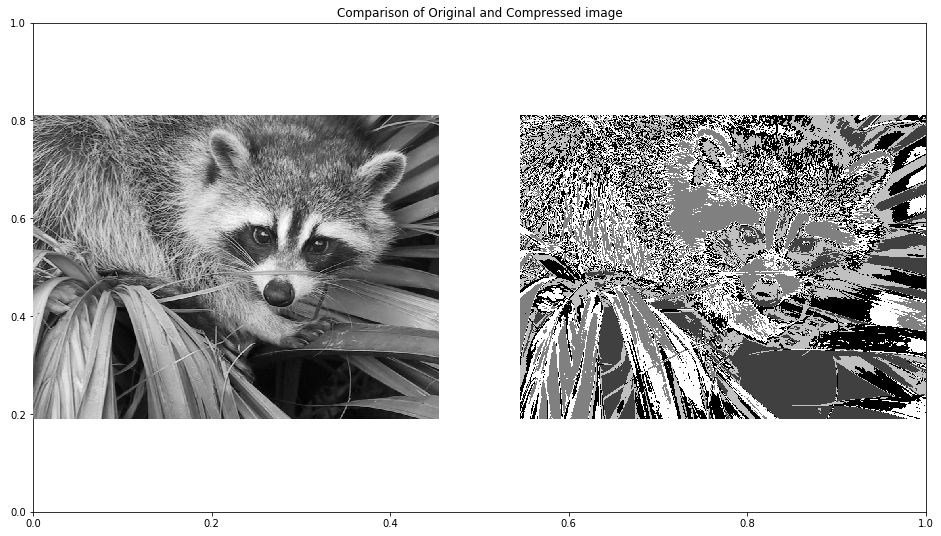

In [10]:
compare_images(face, face_compressed, "Comparison of Original and Compressed image")